## Simple Linear Regression Walkthough in Python

In [1]:
import pandas as pd
import numpy as np
import random

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Spectral"))
sns.set_style("darkgrid")

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams["axes.labelsize"] = 15

#### Generating Random Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


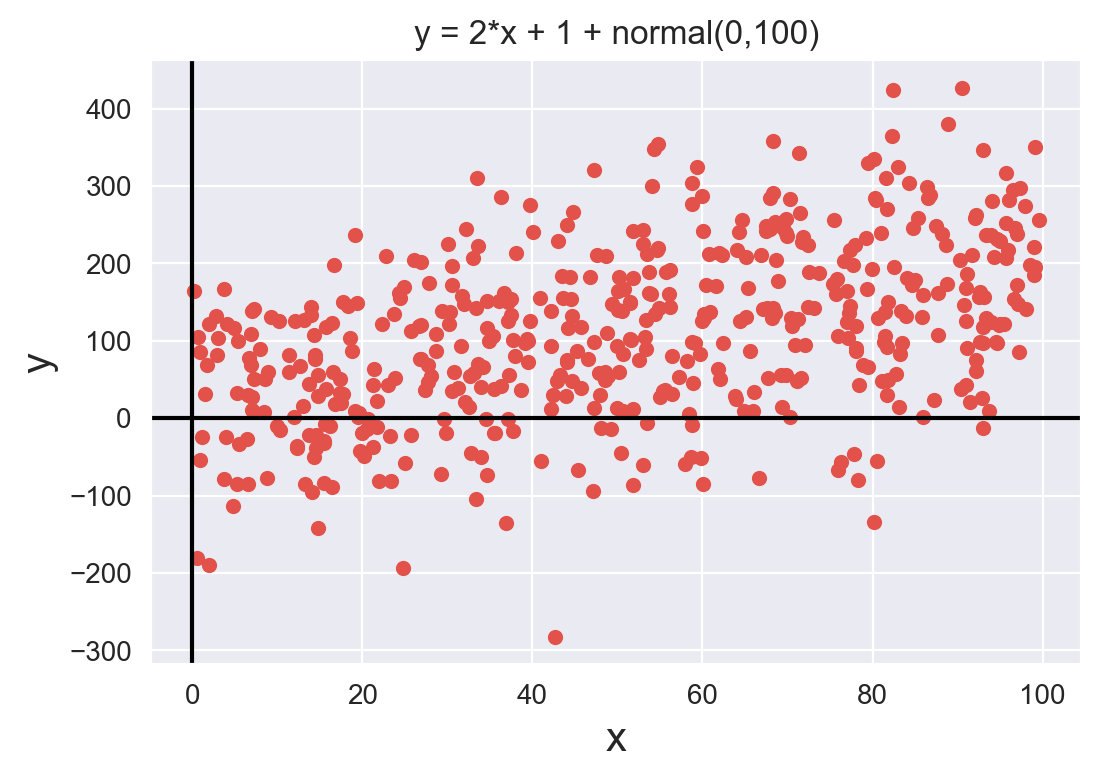

In [2]:
# Generate random data with noise fitting y = b_0 + b_1 * x 
random.seed(1234)
y = []
x = []
b_1 = 2
b_0 = 1
random_deviation_factor = 100

def get_random_deviation(deviation_size) -> float: 
    return np.random.normal(0, deviation_size)

def get_random_val() -> float:
    return random.uniform(0,100)

for _ in range(500):
    x_ir = get_random_val()
    x.append(x_ir)
    y.append(b_0 + b_1 * (x_ir) + get_random_deviation(random_deviation_factor))

df = pd.DataFrame({"x":x,"y":y})

df.to_csv("data1.csv", index = False)

plot = df.plot.scatter('x','y', title = f"y = {b_1}*x + {b_0} + normal(0,{random_deviation_factor})")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')

plt.savefig("scatter.png")

#### Plotting Candidate Regression Lines

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1200x800 with 0 Axes>

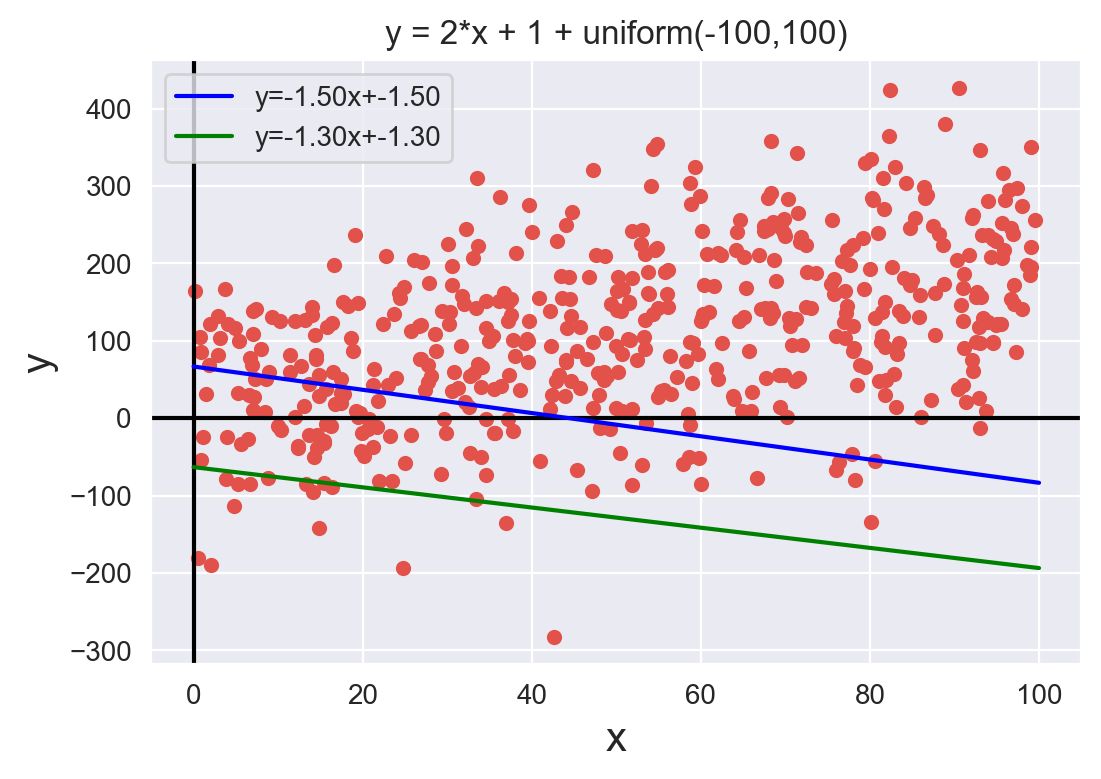

In [3]:
# Randomly plot a bunch of candidate regression lines and record their MSE and parameters
x = np.array(x)
y_actual = b_0 + x * b_1

# generate parameter guesses
num_points = 100
b_1_g = np.random.uniform(-5,5,size = num_points)
b_0_g = np.random.uniform(-100,100,size = num_points)

# plot a two random lines form parameter guesses 
plt.clf()
df.plot.scatter('x','y', title = f"y = {b_1}*x + {b_0} + uniform(-{random_deviation_factor},{random_deviation_factor})")
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')

x_lin = np.linspace(0,100,100)
for i in "bg":
    random_point = random.randint(0,num_points-1)
    plt.plot(x_lin, x_lin * b_1_g[random_point] + b_0_g[random_point], 
             '-{}'.format(i), label='y={0:.2f}x+{0:.2f}'.format(b_1_g[random_point],b_0_g[random_point]))
plt.legend()
plt.savefig("scatter_lines.png")

#### Visualize Loss Surface

C:\Users\randymi\AppData\Local\Temp\ipykernel_19804\1570826794.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


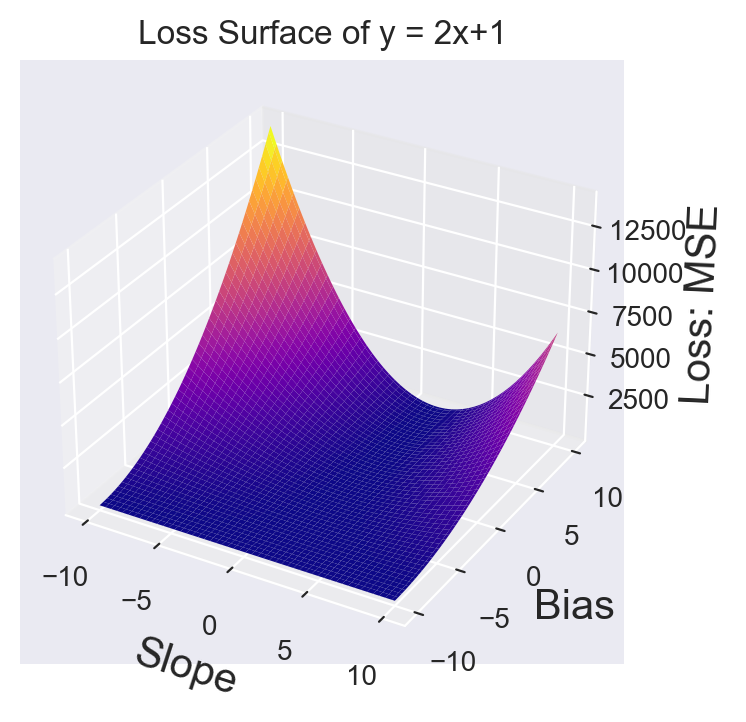

In [4]:
# Visualize Loss Surface

# Use intervals instead of random points for smooth curve
x = range(1,101)
y = list(map(lambda b: b*2 + 1,x))
b_0, b_1 = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))  

# ypred[b_1][b_0]
ypred = b_1*x + b_0  
loss = np.power((y-ypred),2)/len(x)

fig = plt.figure()  
ax = fig.gca(projection='3d')  
surf = ax.plot_surface(b_1, b_0, loss, cmap='plasma', edgecolor='none')  
ax.set_xlabel('Slope')  
ax.set_ylabel('Bias')  
ax.set_zlabel("Loss: MSE")
ax.title.set_text('Loss Surface of y = 2x+1')

fig.savefig("loss_surface.png")

#### By hand

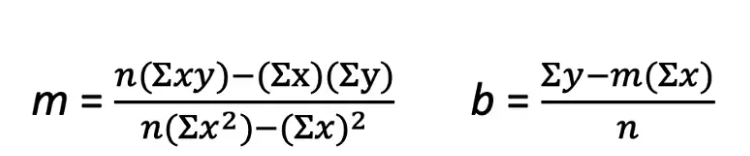

In [19]:
from IPython import display
display.Image("ols.png")

#### With Stats Models

In [24]:
df = pd.read_csv("data.csv")
import statsmodels.api as sm
Y = df['y']

X = df['x']
X = sm.add_constant(X)

model = sm.OLS(Y,X)

results = model.fit()
results.params

const   -35.062384
x         2.686126
dtype: float64